## Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [45]:
# Import the necessary libraries
library(ggplot2)
library(scales)
library(tidyverse)  
library(tidyr)
library(dplyr)
library(lubridate)

In [46]:
# Read in the data files
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

### *Dataset Description for New York City Bike share*

In [47]:
# Column Names for NYC
names(ny)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [48]:
# View several records from the NYC Bike share
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [49]:
# The Row and Column number count for NYC
dim(ny)

[1] 54770     9

In [50]:
# Summary of the standard statistical data from the NYC bike share
summary(ny)

       X                         Start.Time                   End.Time    
 Min.   :     47   2017-05-11 18:26:10:    3   2017-01-03 08:54:10:    2  
 1st Qu.:1712425   2017-01-04 13:58:24:    2   2017-01-04 17:21:55:    2  
 Median :3418634   2017-01-09 09:36:01:    2   2017-01-05 17:25:17:    2  
 Mean   :3415873   2017-01-21 15:36:56:    2   2017-01-12 08:34:01:    2  
 3rd Qu.:5123382   2017-01-21 17:49:59:    2   2017-01-12 09:41:54:    2  
 Max.   :6816152   2017-01-21 20:08:29:    2   2017-01-12 20:34:42:    2  
                   (Other)            :54757   (Other)            :54758  
 Trip.Duration                     Start.Station  
 Min.   :     61.0   Pershing Square North:  592  
 1st Qu.:    368.0   W 21 St & 6 Ave      :  385  
 Median :    610.0   Broadway & E 22 St   :  383  
 Mean   :    903.6   E 17 St & Broadway   :  380  
 3rd Qu.:   1051.0   West St & Chambers St:  364  
 Max.   :1088634.0   W 20 St & 11 Ave     :  329  
 NA's   :1           (Other)              :

### *Data Description for Washington, D.C. Bike share*

In [51]:
# Column Names for Wash, D.C.
# Does not have Gender or Birth.Year columns
names(wash)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"

In [52]:
# View several records from the Wash, D.C. Bike share
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [53]:
# The Row and Column number count for Wash, D.C.
dim(wash)

[1] 89051     7

In [54]:
# Summary of the standard statistical data from the Wash, D.C. bike share
summary(wash)

       X                         Start.Time                   End.Time    
 Min.   :      7   2017-02-19 12:19:00:    6   2017-03-09 17:54:00:    7  
 1st Qu.: 434587   2017-02-20 11:35:00:    6   2017-03-28 18:11:00:    7  
 Median : 872858   2017-02-24 17:46:00:    6   2017-01-13 17:48:00:    6  
 Mean   : 873881   2017-03-01 08:20:00:    6   2017-01-31 08:49:00:    6  
 3rd Qu.:1313305   2017-03-02 08:39:00:    6   2017-02-13 18:09:00:    6  
 Max.   :1751392   2017-03-09 17:31:00:    6   2017-02-20 11:38:00:    6  
                   (Other)            :89015   (Other)            :89013  
 Trip.Duration                                   Start.Station  
 Min.   :    60.3   Columbus Circle / Union Station     : 1700  
 1st Qu.:   410.9   Lincoln Memorial                    : 1546  
 Median :   707.0   Jefferson Dr & 14th St SW           : 1488  
 Mean   :  1234.0   Massachusetts Ave & Dupont Circle NW: 1219  
 3rd Qu.:  1233.2   Jefferson Memorial                  : 1068  
 Max.   :9

### *Dataset Description for Chicago Bike share*

In [55]:
# The colunm names for Chicago
names(chi)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [56]:
# View several records from the Chicago Bike share
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [57]:
# The Row and Column number count for Chicago
dim(chi)

[1] 8630    9

In [58]:
# Summary of the standard statistical data from the Chicago bike share
summary(chi)

       X                         Start.Time                  End.Time   
 Min.   :     36   2017-01-24 07:40:32:   2   2017-04-16 13:16:52:   2  
 1st Qu.: 386722   2017-04-22 13:16:25:   2   2017-04-26 16:29:26:   2  
 Median : 773554   2017-05-27 15:17:50:   2   2017-05-21 16:20:56:   2  
 Mean   : 776721   2017-06-10 13:29:41:   2   2017-05-27 09:58:21:   2  
 3rd Qu.:1171266   2017-06-20 17:05:11:   2   2017-06-25 14:51:35:   2  
 Max.   :1551248   2017-06-21 13:18:52:   2   2017-01-01 00:46:32:   1  
                   (Other)            :8618   (Other)            :8619  
 Trip.Duration                          Start.Station 
 Min.   :   60.0   Streeter Dr & Grand Ave     : 210  
 1st Qu.:  394.2   Lake Shore Dr & Monroe St   : 140  
 Median :  670.0   Clinton St & Washington Blvd: 120  
 Mean   :  937.2   Clinton St & Madison St     : 102  
 3rd Qu.: 1119.0   Canal St & Adams St         : 101  
 Max.   :85408.0   Michigan Ave & Oak St       :  98  
                   (Other)     

### Wrangling the Data
- Clean up some of the data to make more efficient, as well as create new columns needed.
- Merge datasets.

In [59]:
# Create Null Columns for Gender and Birth.Year for the Wash, D.C. dataset for merging purposes
wash$Gender <- NA
wash$Birth.Year <- NA

In [60]:
# Create a new column called "City" from dataset city name
ny$City <- 'New York City'
wash$City <- 'Washington'
chi$City <- 'Chicago'

In [61]:
# Create a new function to merge all 3 datasets
merge <- function(c1, c2) {
    return(rbind(c1, c2))
}

In [62]:
# Merge all 3 datasets as "merge_data"
merge_data <- merge(ny, wash)
merge_data <- merge(merge_data, chi)

In [63]:
# Convert Start and End Data types
merge_data$Start.Time<-ymd_hms(merge_data$Start.Time)
merge_data$End.Time <- ymd_hms(merge_data$End.Time)

Warning message:
“ 1 failed to parse.”

In [64]:
# Create a new column "day" from Start.Time
merge_data$day <- day(merge_data$Start.Time)

In [65]:
# Table with updated column names
colnames(merge_data)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
 [5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
 [9] "Birth.Year"    "City"          "day"

In [66]:
# Create new column 'Day of Week' from Start.Time
merge_data$day_of_week <- weekdays(merge_data$Start.Time)
# head(merge_data)

In [67]:
# Creating new column 'Month' from Start.Time
merge_data$Month <- month(merge_data$Start.Time)
# head(merge_data)

In [68]:
# Creating new column 'Year' from Start.Time
merge_data$Year <- year(merge_data$Start.Time)
# head(merge_data)

In [69]:
# Convert Start and End Data types
merge_data$Start.Time<-ymd_hms(merge_data$Start.Time)
merge_data$End.Time <- ymd_hms(merge_data$End.Time)

In [70]:
# Merge dataset with all new columns
merge_data$ride_length <- difftime(merge_data$End.Time,merge_data$Start.Time,units = "mins")
head(merge_data)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City,day,day_of_week,Month,Year,ride_length
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York City,11,Sunday,6,2017,13.26667 mins
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York City,11,Thursday,5,2017,11.53333 mins
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York City,29,Wednesday,3,2017,22.08333 mins
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York City,8,Monday,5,2017,11.71667 mins
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York City,21,Wednesday,6,2017,5.50000 mins
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York City,22,Wednesday,2,2017,16.65000 mins


## Question 1


## **Popular times of Travel (i.e., occurs most often in the start time)**
- What is the most common Month?
- What is the most common Day of Week?

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

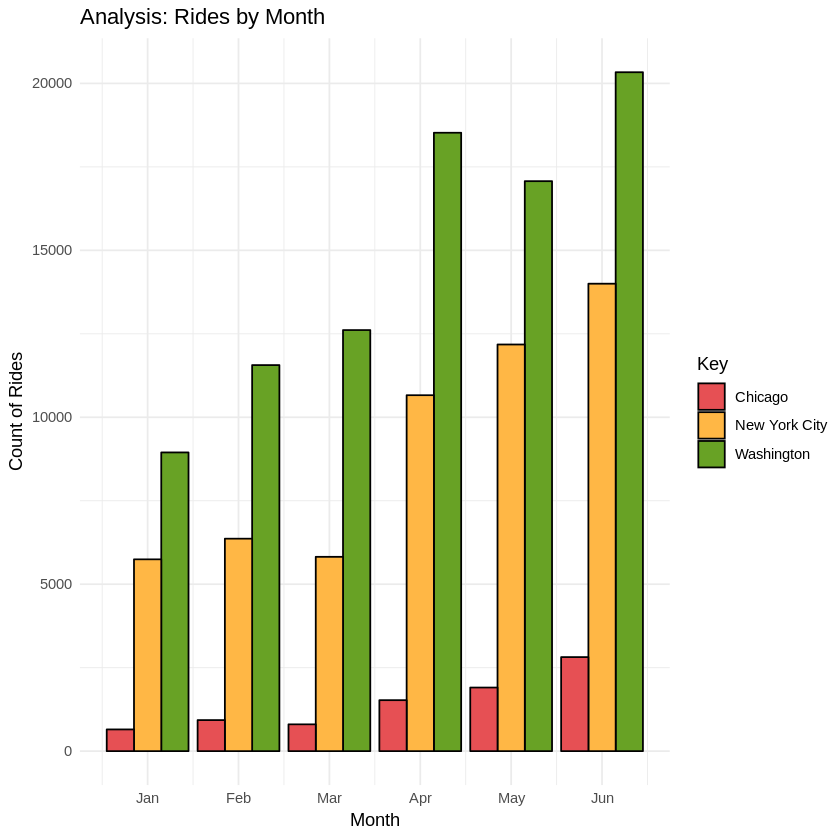

In [71]:
# Bar Chart of Months by City
ggplot(aes(x = Month, fill = City), data = merge_data) +
geom_bar(position = 'dodge', colour="black") +
scale_x_continuous(breaks = c(1,2,3,4,5,6), labels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun')) +
ggtitle('Analysis: Rides by Month') +
labs(y = 'Count of Rides', x = 'Month') +
scale_fill_manual("Key", values = c("Chicago" = "#e65054", "New York City" = "#ffb745", "Washington" = "#68a225")) +
theme_minimal()

In [72]:
# Load function
# Need for crosstab
source("http://pcwww.liv.ac.uk/~william/R/crosstab.r")

In [73]:
# Count and percentage of users per month
# sort the dataframe in R using arrange
# Frequency Count
c2 = arrange(merge_data,Month)
c = crosstab(c2, row.vars = "Month")
c

     
Month     Count   Total %
  1    15341.00     10.06
  2    18857.00     12.37
  3    19235.00     12.62
  4    30709.00     20.14
  5    31157.00     20.44
  6    37151.00     24.37
  Sum 152450.00    100.00

In [86]:
# Frequency of Users per month by City
crosstab(merge_data, row.vars = "Month", col.vars = "City")

      City Chicago New York City Washington    Sum
Month                                             
1              650          5745       8946  15341
2              930          6364      11563  18857
3              803          5820      12612  19235
4             1526         10661      18522  30709
5             1905         12180      17072  31157
6             2816         14000      20335  37151
Sum           8630         54770      89050 152450

In [87]:
# Percentage of Users per month by City
crosstab(merge_data, row.vars = "Month", col.vars = "City", type = "r")

      City Chicago New York City Washington    Sum
Month                                             
1             4.24         37.45      58.31 100.00
2             4.93         33.75      61.32 100.00
3             4.17         30.26      65.57 100.00
4             4.97         34.72      60.31 100.00
5             6.11         39.09      54.79 100.00
6             7.58         37.68      54.74 100.00

In [75]:
# Count and percentage of users per Day of Week
y = crosstab(merge_data, row.vars = "day_of_week")
y

           
day_of_week     Count   Total %
  Friday     22379.00     14.68
  Monday     20593.00     13.51
  Saturday   19459.00     12.76
  Sunday     19274.00     12.64
  Thursday   23187.00     15.21
  Tuesday    22478.00     14.74
  Wednesday  25080.00     16.45
  Sum       152450.00    100.00

### Summary of Question 1 results

- Out of all 6 months of bike sharing between the cities, the month of June was the most common month, with 24.37% of the total rides.
- Washington had the highest percentage among the cities during June with 54.74%.
- I think the month of June probably has the most comfortable weather for all cities. The warmer temparatures allow more riders to get out and ride.
- The least popular month for bike sharing is January with 10.06%. This is predictates by the colder temperatures at the beginning of the year. Less riders, ride during January and February.
- The most common day of the week is Wednesday, with 16.45% of riders, riding in the middle of the week.
- I think the middle of the week is prime time for riders to get out explore the nicer temperatures.

## Question 2

## **Trip Duration.**
- What is the Average Travel Time for Users in different Cities?

In [89]:
# Total Count of Users in each City
total_city = sort(table(merge_data$City))
print(total_city)


      Chicago New York City    Washington 
         8630         54770         89051 


In [88]:
# Percentage of Users in each City
round((total_city / sum(total_city) * 100), digits = 2)


      Chicago New York City    Washington 
         5.66         35.93         58.41 

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

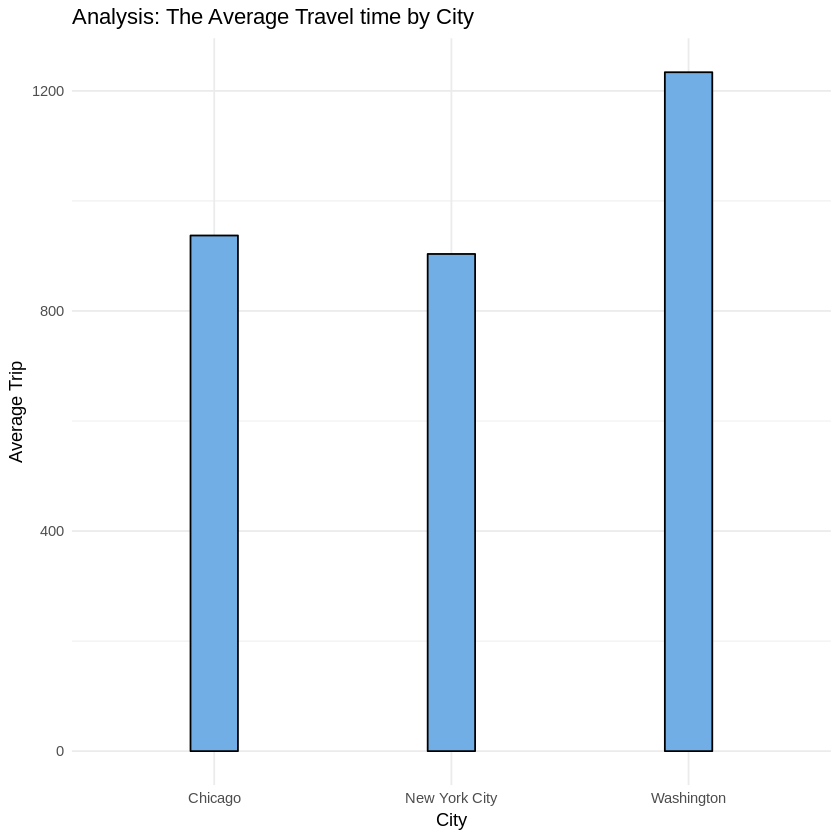

In [80]:
# Bar Chart of Average Travel time by City
ggplot(aes(x = City, y = Trip.Duration), data = merge_data) +
geom_bar(position = 'dodge', stat = "summary", fun.y = "mean", fill = "#72aee6", colour="black", width = 0.2) + 
# geom_text(aes(label = ride_length), vjust = -0.25) +
ggtitle('Analysis: The Average Travel time by City') +
labs(y = 'Average Trip', x = 'City') +
theme_minimal()

In [81]:
# Average Trip Duration for Users by City
my.summary <- with(merge_data, aggregate(list(Trip.Duration), by = list(City), 
                   F = function(x) { mon.mean = mean(x, na.rm = TRUE) } ))

colnames(my.summary) <- c('City', 'Average.Trip.Duration')
my.summary

City,Average.Trip.Duration
Chicago,937.1728
New York City,903.6147
Washington,1233.9533


### Summary of Question 2 results

- The city of Washington had the highest average trip duration with 1233.9533, probably due to the fact that the majority of the riders, came from this city with 58.41%.
- The percentage break down for the count of users was Washington (58.41%), New York (35.93%), and Chicago (5.66%).
- The average trip duration for New York (903.6147) and Chicago (937.1728) was fairly close, even though Chicago had the lowest of the three, when it comes to the number of users. Longer trip with less riders, wow!

## Question 3
## **User Information**
- What are the counts of each User Type?
- What are the counts of each Gender (only available for NYC and Chicago)?

In [82]:
# Counts of each User Type by City
crosstab(merge_data, row.vars = "City", col.vars = "User.Type", type = "f")

              User.Type        Customer Subscriber    Sum
City                                                     
Chicago                      1     1746       6883   8630
New York City              119     5558      49093  54770
Washington                   1    23450      65600  89051
Sum                        121    30754     121576 152451

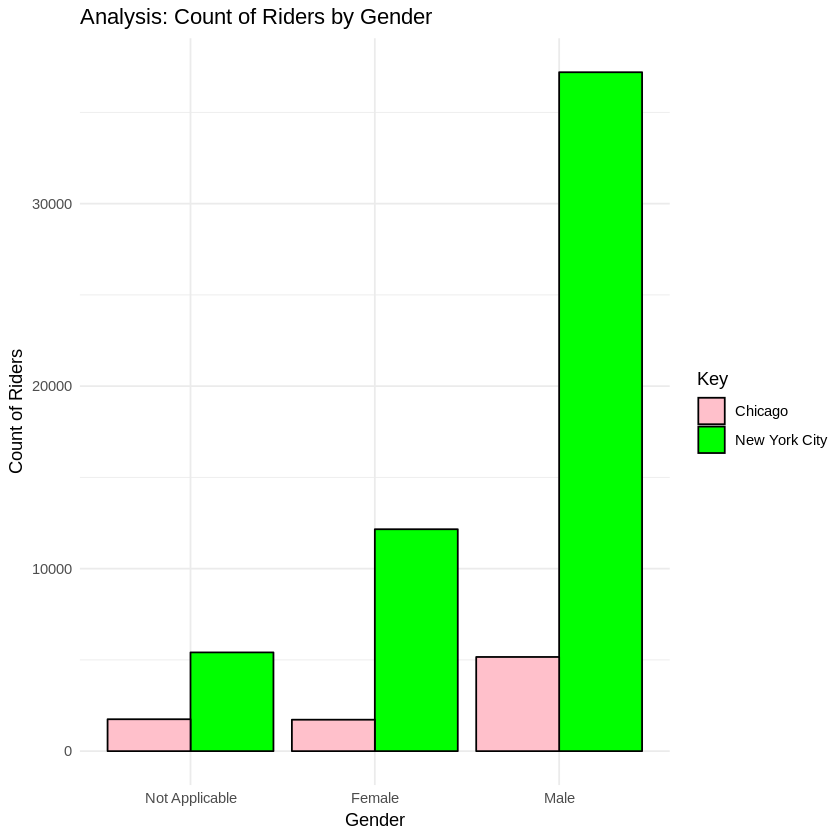

In [90]:
# Bar Chart of Rides by Gender
ggplot(aes(x = Gender, fill = City), data = merge_data2) +
geom_bar(position = 'dodge', colour="black") +
ggtitle('Analysis: Count of Riders by Gender') +
scale_x_discrete(labels = c('Not Applicable', 'Female', 'Male')) +
labs(y = 'Count of Riders', x = 'Gender') +
scale_fill_manual("Key", values = c("Chicago" = "Pink", "New York City" = "Green")) +
theme_minimal()

In [84]:
# Creating new merge data(2) by combining NYC and Chicago data
# Exclude Wash, D.C. data because of Gender and Birth.Year missing values
merge_data2 <- merge(chi,ny)

In [91]:
# Gender count by City (Chicago and NYC)
crosstab(merge_data2, row.vars = "City", col.vars = "Gender", type = "f")

              Gender       Female  Male   Sum
City                                         
Chicago               1748   1723  5159  8630
New York City         5410  12159 37201 54770
Sum                   7158  13882 42360 63400

In [85]:
# Gender percentages by City (Chicago and NYC)
crosstab(merge_data2, row.vars = "City", col.vars = "Gender", type = "r")

              Gender        Female   Male    Sum
City                                            
Chicago               20.25  19.97  59.78 100.00
New York City          9.88  22.20  67.92 100.00

### Summary of Question 3 results

- The Subscriber led the way for user type by a huge amount. 
- **Subscriber (121,576)** and **Customer (30,754)**
- The subscriber population came out of Washington.
- By having an account, Subscriber probably enjoy the ease process renting and processing payments.
- For some reason, there were user types not disclose for all cities.

**Note:** Data (Gender and Birth.Year) not available for Washingtion
- Data includes users for Chicago and New York City:
    - **Male: 42,360 (67.92%)**
    - **Female: 13,882 (22.20%)**
    - **Not Applicable: (9.88)**
- The **Male (42,360)** riders had a huge margin ahead of **Female (13,882)** rides for Chicago and New York City.
- Once again, there were genders not disclose for both city. I'm not sure way.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')